In [ ]:
#CIS 9650 Project
#AirBnB in NYC Data Analysis

In [ ]:
##Part I: IMPORT DATA USING KAGGLE API

In [ ]:
pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#If the file is missing, download it using Kaggle API
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'krishishah27'
os.environ['KAGGLE_KEY'] = '87d3cb9ea26bc2e70ce34bc3e215c1b1'

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import os

#Initialize and authenticate the Kaggle API
api = KaggleApi()
api.authenticate()

#Define the dataset identifier and the specific file name based on the website
dataset_identifier = "dgomonov/new-york-city-airbnb-open-data"
filename = "AB_NYC_2019.csv"

#Download the specific file directly, specifying the download path
api.dataset_download_file(dataset_identifier, filename, path=os.getcwd())

#Construct the full file path using os.path.join
file_path = os.path.join(os.getcwd(), filename)

#Load the downloaded file into a Pandas DataFrame using the constructed path
data = pd.read_csv(file_path)

#Display the first few rows of the DataFrame
print(data.head())

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_re

In [ ]:
#By utilizing Kaggle API, we successfully got the dataset in, and the data structure looks clean and organized

In [ ]:
##THIS IS THE END OF PART I

In [ ]:
##PART II: CLEAN THE DATASET

In [ ]:
#Get a summary of the dataset and check if the column names are meaningful
print("Basic Information:")
data.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review  

In [ ]:
#Feedback: The column names are all meaningful and clean
#Feedback: There are 48894 records with 16 columns
#Feedback: The columns are id, name, host_id, host_name, neighbourhood_group, neighbourhood,
#latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review,
#reviews_per_month, calculated_host_listings_count, availability_365
#Check Null Records and Remove Null Records in the data frame

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
#The output above shows that this dataset has missing values in the columns name, host_name, last_review and reviews_per_month

In [ ]:
#Handle 'review_per_month' (10052 values missing)
data[['reviews_per_month']] = data[['reviews_per_month']].fillna({'reviews_per_month':0})

In [ ]:
#Remove unnecessary columns
#We would like to eliminate id, name, host_name and last_review as it is not relevant to our research

In [ ]:
import pandas as pd

#Assuming `data` is your DataFrame
total_records_id = data['id'].count()
total_records_name = data['name'].count()
total_records_host_name = data['host_name'].count()
total_records_last_review = data['last_review'].count()

#Printing the total records for each column
print(f"Total records for 'id': {total_records_id}")
print(f"Total records for 'name': {total_records_name}")
print(f"Total records for 'host_name': {total_records_host_name}")
print(f"Total records for 'last_review': {total_records_last_review}")

#Remove specified columns in-place
columns_to_remove = ['last_review', 'name', 'id', 'host_name']
data.drop(columns=columns_to_remove, axis=1, inplace=True)

#Display the first few rows to confirm removal
print(data.head())

Total records for 'id': 48895
Total records for 'name': 48879
Total records for 'host_name': 48874
Total records for 'last_review': 38843
   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availabi

In [ ]:
#Feedback: 48894 id, 48878 name, 48873 host_name and 38842 last_review entries were removed.
#The dataset is now clean.

In [ ]:
##THIS IS THE END OF PART II

In [ ]:
##PART III: STATISTICAL ANALYSIS

In [ ]:
#Basic Statistics for EDA(Range, Median,Percentage,Percentile) and related Visualizations
#Display range and percentiles for specified columns

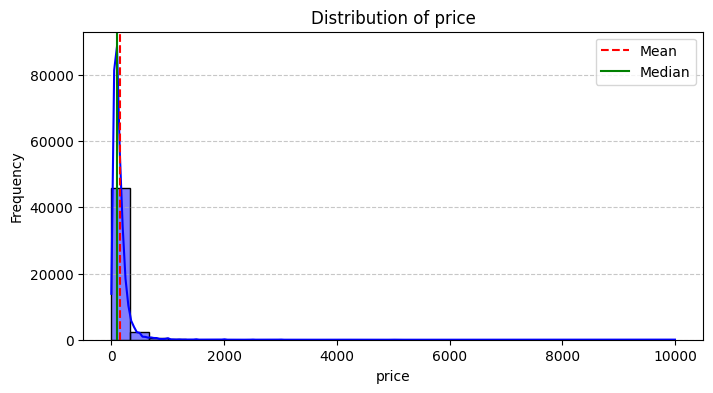

Analysis of 'price':
  Median: 106.0
  Average (Mean): 152.7206871868289
  Range: 10000 (Min: 0, Max: 10000)
  Percentiles:
0.25     69.0
0.50    106.0
0.75    175.0
0.90    269.0
0.99    799.0
Name: price, dtype: float64




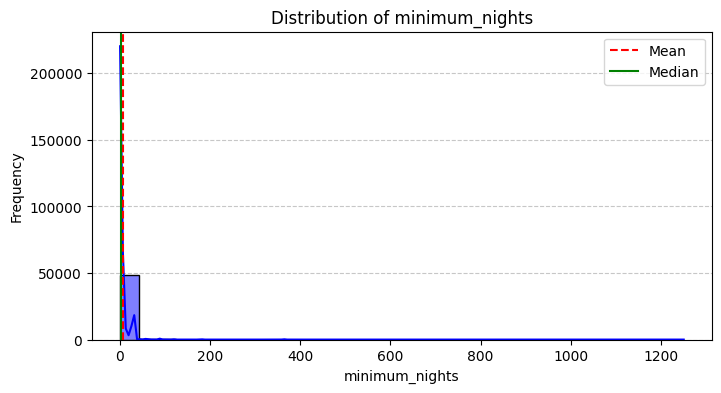

Analysis of 'minimum_nights':
  Median: 3.0
  Average (Mean): 7.029962163820431
  Range: 1249 (Min: 1, Max: 1250)
  Percentiles:
0.25     1.0
0.50     3.0
0.75     5.0
0.90    28.0
0.99    45.0
Name: minimum_nights, dtype: float64




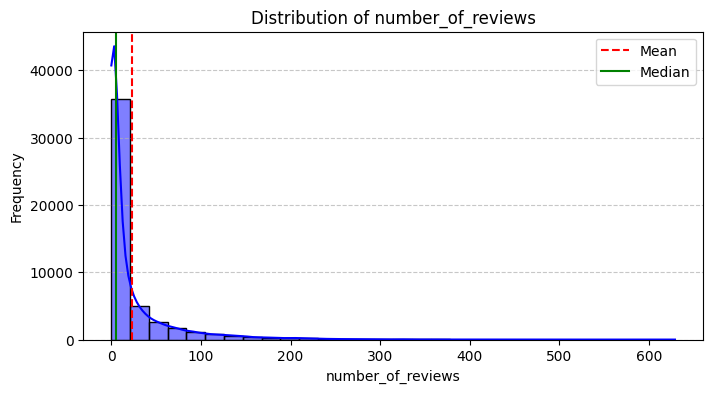

Analysis of 'number_of_reviews':
  Median: 5.0
  Average (Mean): 23.274465691788528
  Range: 629 (Min: 0, Max: 629)
  Percentiles:
0.25      1.0
0.50      5.0
0.75     24.0
0.90     70.0
0.99    214.0
Name: number_of_reviews, dtype: float64




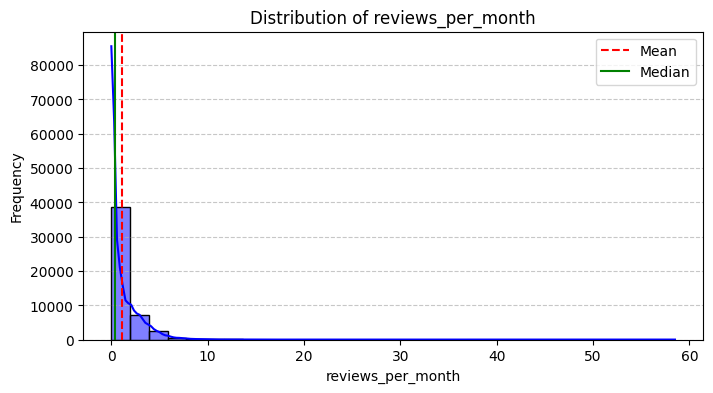

Analysis of 'reviews_per_month':
  Median: 0.37
  Average (Mean): 1.0909099089886491
  Range: 58.5 (Min: 0.0, Max: 58.5)
  Percentiles:
0.25    0.04
0.50    0.37
0.75    1.58
0.90    3.25
0.99    6.80
Name: reviews_per_month, dtype: float64




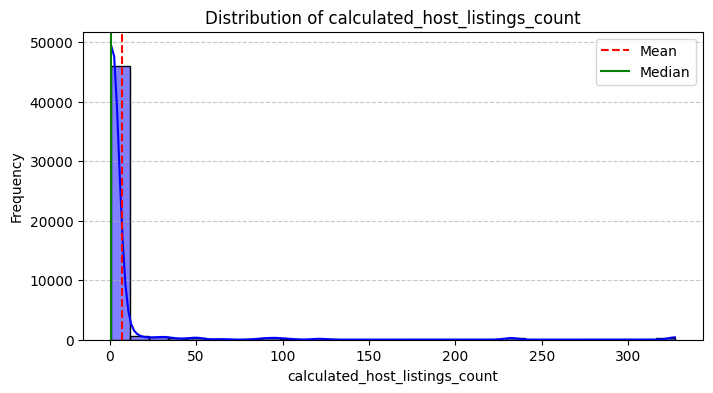

Analysis of 'calculated_host_listings_count':
  Median: 1.0
  Average (Mean): 7.143982002249719
  Range: 326 (Min: 1, Max: 327)
  Percentiles:
0.25      1.0
0.50      1.0
0.75      2.0
0.90      5.0
0.99    232.0
Name: calculated_host_listings_count, dtype: float64




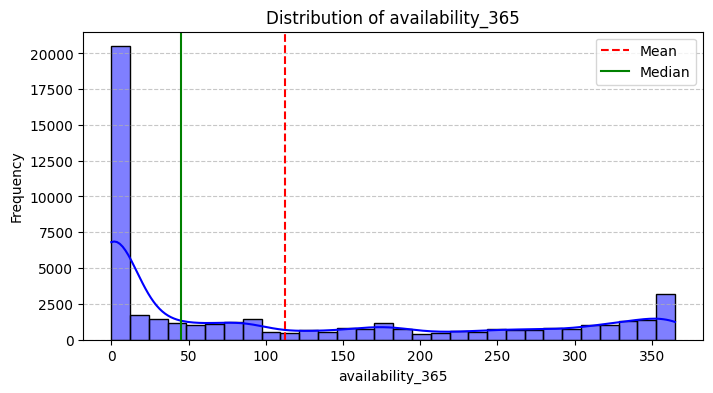

Analysis of 'availability_365':
  Median: 45.0
  Average (Mean): 112.78132733408324
  Range: 365 (Min: 0, Max: 365)
  Percentiles:
0.25      0.0
0.50     45.0
0.75    227.0
0.90    337.0
0.99    365.0
Name: availability_365, dtype: float64




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#List of columns to analyze for the Airbnb dataset
columns_to_analyze = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

#Function to calculate the median, average, range, and percentiles
def analyze_column(df, column):
    #Calculate median and mean
    median_val = df[column].median()
    mean_val = df[column].mean()

    #Calculate range
    min_val = df[column].min()
    max_val = df[column].max()
    col_range = max_val - min_val

    #Calculate percentiles
    percentiles = df[column].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

    #Visualization: Distribution
    plt.figure(figsize=(8, 4)) # Now plt is defined and can be used
    sns.histplot(df[column], bins=30, kde=True, color='blue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
    plt.axvline(median_val, color='green', linestyle='-', label='Median')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    #Print results
    print(f"Analysis of '{column}':")
    print(f"  Median: {median_val}")
    print(f"  Average (Mean): {mean_val}")
    print(f"  Range: {col_range} (Min: {min_val}, Max: {max_val})")
    print("  Percentiles:")
    print(percentiles)
    print("\n")

#Write a for loop to perform basic stats analysis on each column
for column in columns_to_analyze:
    analyze_column(data, column)

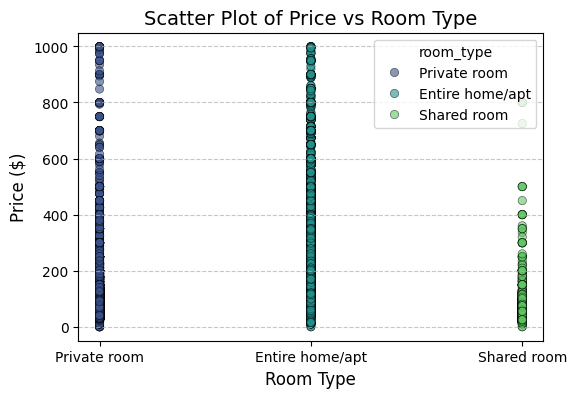

Analysis of 'price' for Room Type: Private room
  Median: 70.0
  Average (Mean): 89.78097285675894
  Standard Deviation: 160.20526236647413
  Range: 10000 (Min: 0, Max: 10000)
  Percentiles:
0.25     50.0
0.50     70.0
0.75     95.0
0.90    131.0
0.99    400.0
Name: price, dtype: float64
  Outliers: 1290 (Lower Bound: -17.5, Upper Bound: 162.5)


Analysis of 'price' for Room Type: Entire home/apt
  Median: 160.0
  Average (Mean): 211.79424613325986
  Standard Deviation: 284.04161093250707
  Range: 10000 (Min: 0, Max: 10000)
  Percentiles:
0.25    120.0
0.50    160.0
0.75    229.0
0.90    347.0
0.99    994.2
Name: price, dtype: float64
  Outliers: 1871 (Lower Bound: -43.5, Upper Bound: 392.5)


Analysis of 'price' for Room Type: Shared room
  Median: 45.0
  Average (Mean): 70.12758620689655
  Standard Deviation: 101.72525177335876
  Range: 1800 (Min: 0, Max: 1800)
  Percentiles:
0.25     33.0
0.50     45.0
0.75     75.0
0.90    110.0
0.99    420.5
Name: price, dtype: float64
  Outliers:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#List of columns to analyze for the Airbnb dataset
columns_to_analyze = ['price']

#Function to calculate the median, average, range, percentiles, standard deviation, and outliers for each room type
def analyze_column_by_room_type(df, column):
    #Group by 'room_type' and analyze 'price'
    room_types = df['room_type'].unique()

    for room_type in room_types:
        print(f"Analysis of '{column}' for Room Type: {room_type}")
        room_data = df[df['room_type'] == room_type]

        #Calculate median, mean, and standard deviation
        median_val = room_data[column].median()
        mean_val = room_data[column].mean()
        std_dev = room_data[column].std()

        #Calculate range
        min_val = room_data[column].min()
        max_val = room_data[column].max()
        col_range = max_val - min_val

        #Calculate percentiles
        percentiles = room_data[column].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

        #Outlier detection using IQR
        q1, q3 = percentiles[0.25], percentiles[0.75]
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        outliers = room_data[(room_data[column] < lower_bound) | (room_data[column] > upper_bound)]

        #Print results
        print(f"  Median: {median_val}")
        print(f"  Average (Mean): {mean_val}")
        print(f"  Standard Deviation: {std_dev}")
        print(f"  Range: {col_range} (Min: {min_val}, Max: {max_val})")
        print("  Percentiles:")
        print(percentiles)
        print(f"  Outliers: {len(outliers)} (Lower Bound: {lower_bound}, Upper Bound: {upper_bound})")
        print("\n")

        #Visualize the distribution for this room type
#Calculate count and average price for each room_type
room_type_count = data['room_type'].value_counts()
avg_price_by_room_type = data.groupby('room_type')['price'].mean()

#Combine into a DataFrame for easier plotting
room_type_stats = pd.DataFrame({
    'Count': room_type_count,
    'Average Price': avg_price_by_room_type
}).sort_index()

#Calculate average price by room_type
avg_price_by_room_type = data.groupby('room_type')['price'].mean()

filtered_data = data[data['price'] < 1000]

#Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=filtered_data,
    x='room_type',
    y='price',
    hue='room_type',
    palette='viridis',
    alpha=0.6,
    edgecolor='black'
)

#Add plot title and labels
plt.title('Scatter Plot of Price vs Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Write a for loop to perform basic stats analysis on 'price' for each room type
for column in columns_to_analyze:
    analyze_column_by_room_type(data, column)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#List of columns to analyze for the Airbnb dataset
columns_to_analyze = ['price']

# Function to calculate the median, average, range, percentiles, standard deviation, and outliers for each neighbourhood group
def analyze_column_by_neighbourhood_group(df, column):
    #Group by 'neighbourhood_group' and analyze 'price'
    neighbourhood_groups = df['neighbourhood_group'].unique()

    for neighbourhood_group in neighbourhood_groups:
        print(f"Analysis of '{column}' for Neighbourhood Group: {neighbourhood_group}")
        neighbourhood_data = df[df['neighbourhood_group'] == neighbourhood_group]

        #Calculate median, mean, and standard deviation
        median_val = neighbourhood_data[column].median()
        mean_val = neighbourhood_data[column].mean()
        std_dev = neighbourhood_data[column].std()

        #Calculate range
        min_val = neighbourhood_data[column].min()
        max_val = neighbourhood_data[column].max()
        col_range = max_val - min_val

        #Calculate percentiles
        percentiles = neighbourhood_data[column].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

        #Outlier detection using IQR
        q1, q3 = percentiles[0.25], percentiles[0.75]
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        outliers = neighbourhood_data[(neighbourhood_data[column] < lower_bound) | (neighbourhood_data[column] > upper_bound)]

        print(f"  Median: {median_val}")
        print(f"  Average (Mean): {mean_val}")
        print(f"  Standard Deviation: {std_dev}")
        print(f"  Range: {col_range} (Min: {min_val}, Max: {max_val})")
        print("  Percentiles:")
        print(percentiles)
        print(f"  Outliers: {len(outliers)} (Lower Bound: {lower_bound}, Upper Bound: {upper_bound})")
        print("\n")


#Write a for loop to perform basic stats analysis on 'price' for each neighbourhood group
for column in columns_to_analyze:
    analyze_column_by_neighbourhood_group(data, column)


Analysis of 'price' for Neighbourhood Group: Brooklyn
  Median: 90.0
  Average (Mean): 124.38320732192598
  Standard Deviation: 186.87353781366113
  Range: 10000 (Min: 0, Max: 10000)
  Percentiles:
0.25     60.0
0.50     90.0
0.75    150.0
0.90    210.0
0.99    550.0
Name: price, dtype: float64
  Outliers: 996 (Lower Bound: -75.0, Upper Bound: 285.0)


Analysis of 'price' for Neighbourhood Group: Manhattan
  Median: 150.0
  Average (Mean): 196.8758136743456
  Standard Deviation: 291.38318274158297
  Range: 10000 (Min: 0, Max: 10000)
  Percentiles:
0.25     95.0
0.50    150.0
0.75    220.0
0.90    333.0
0.99    999.0
Name: price, dtype: float64
  Outliers: 1289 (Lower Bound: -92.5, Upper Bound: 407.5)


Analysis of 'price' for Neighbourhood Group: Queens
  Median: 75.0
  Average (Mean): 99.51764913519237
  Standard Deviation: 167.10215506344343
  Range: 9990 (Min: 10, Max: 10000)
  Percentiles:
0.25     50.0
0.50     75.0
0.75    110.0
0.90    175.0
0.99    400.0
Name: price, dtype: flo

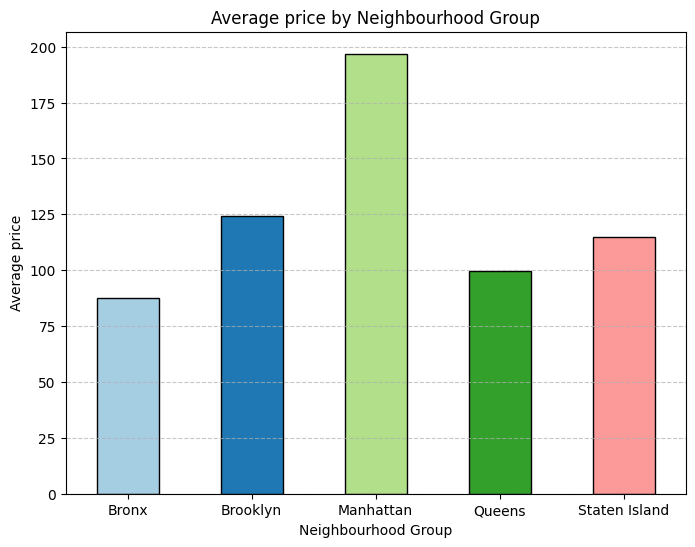

In [ ]:
#Bar Chart Visualization
def visualize_price_by_neighbourhood_group_bar(df, column):
    group_stats = df.groupby('neighbourhood_group')[column].mean()

    plt.figure(figsize=(8, 6))
    group_stats.plot(kind='bar', color=plt.cm.Paired.colors, edgecolor='black')
    plt.title(f"Average {column} by Neighbourhood Group")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel(f"Average {column}")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

visualize_price_by_neighbourhood_group_bar(data, 'price')


In [ ]:
##THIS IS THE END OF PART III

In [ ]:
##PART IV: DATA VISUALIZATION

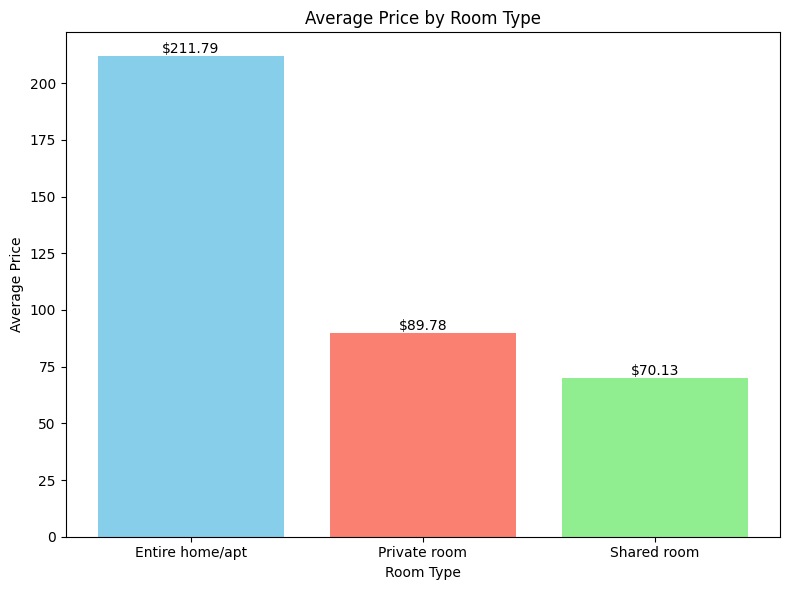

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('AB_NYC_2019.csv')

#Calculate mean price for each room type
room_type_avg_price = data.groupby('room_type')['price'].mean().sort_values(ascending=False)

#Define colors for the bars (one color per room type)
colors = ['skyblue', 'salmon', 'lightgreen']

#Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(room_type_avg_price.index, room_type_avg_price.values, color=colors)

#Add annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}', ha='center', va='bottom')

#Customize the plot
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.xticks(rotation=0)
plt.tight_layout()

#Display the chart
plt.show()

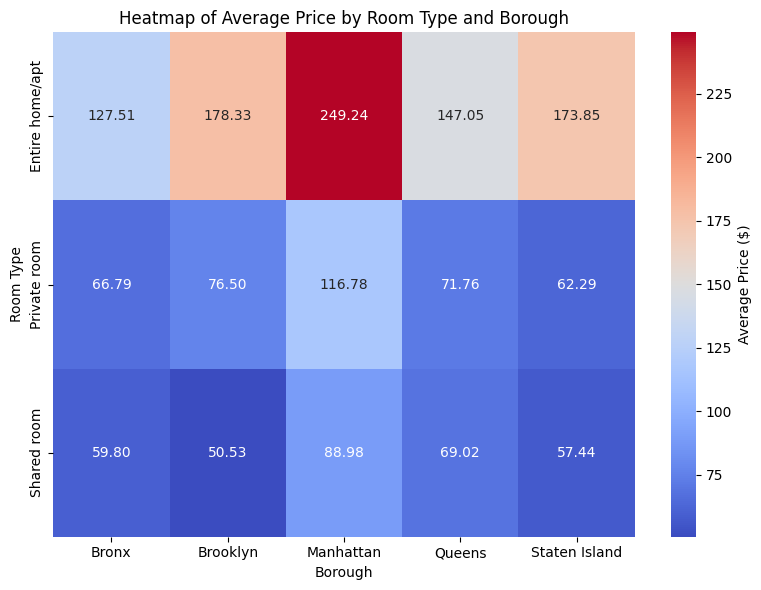

In [ ]:
#Calculate average price for each room type and neighbourhood group
pivot_table = data.pivot_table(values='price', index='room_type', columns='neighbourhood_group', aggfunc='mean')

#Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Average Price ($)'})
plt.title("Heatmap of Average Price by Room Type and Borough")
plt.ylabel("Room Type")
plt.xlabel("Borough")
plt.tight_layout()
plt.show()

   neighbourhood_group        room_type  count
1                Bronx     Private room    652
4             Brooklyn     Private room  10132
6            Manhattan  Entire home/apt  13199
10              Queens     Private room   3372
13       Staten Island     Private room    188


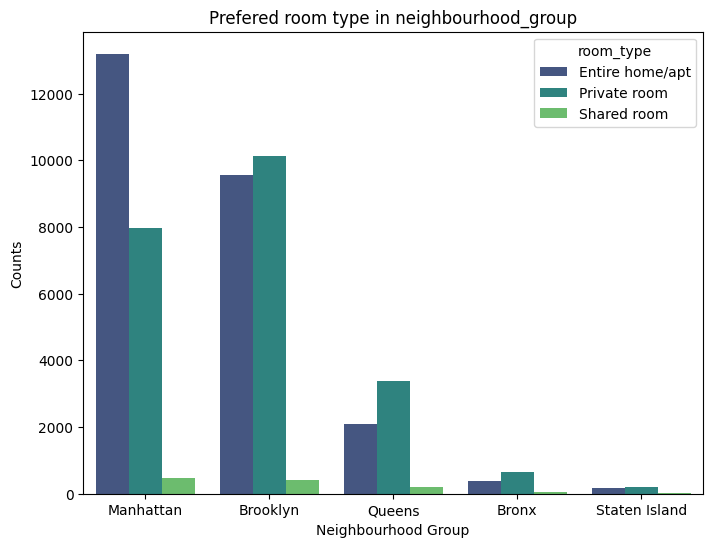

In [ ]:
room_counts = data.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

most_used_room_type = room_counts.loc[room_counts.groupby('neighbourhood_group')['count'].idxmax()]

print(most_used_room_type)

room_counts = data.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
plt.figure(figsize=(8, 6))
room_counts = room_counts.sort_values(by='count', ascending=False)
sns.barplot(data=room_counts, x='neighbourhood_group', y='count', hue='room_type', palette='viridis')
plt.title("Prefered room type in neighbourhood_group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Counts")
plt.show()

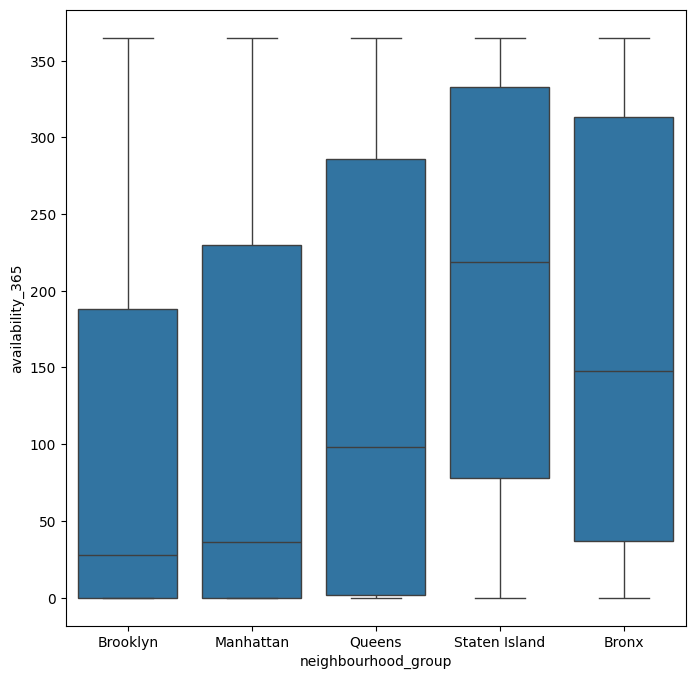

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365')

Analysis of 'minimum_nights':
  Mean: 7.03
  Median: 3.00
  Range: 1249.00 (Min: 1.00, Max: 1250.00)




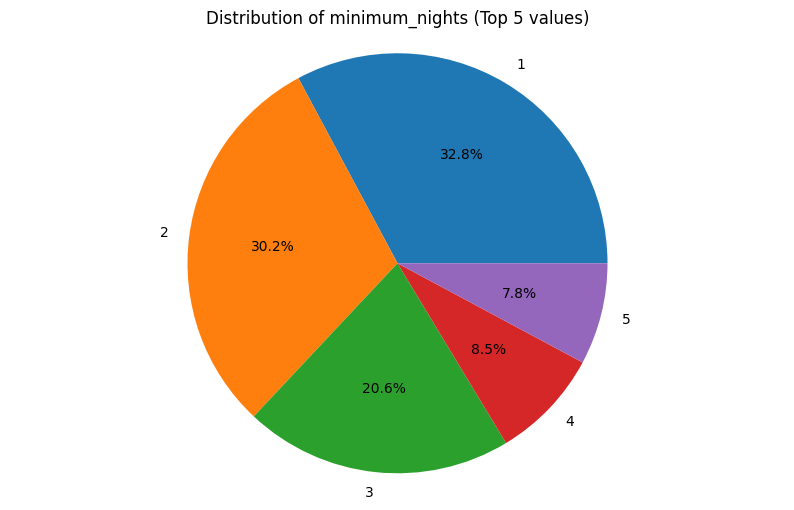

In [ ]:
#Columns to analyze
columns_to_analyze = ['minimum_nights']

def analyze_and_visualize_column(df, column):
    #Calculate statistics
    mean_val = df[column].mean()
    median_val = df[column].median()
    min_val = df[column].min()
    max_val = df[column].max()

    #Print results
    print(f"Analysis of '{column}':")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Range: {max_val - min_val:.2f} (Min: {min_val:.2f}, Max: {max_val:.2f})")
    print("\n")

    #Create pie chart
    plt.figure(figsize=(10, 6))
    value_counts = df[column].value_counts().sort_index().head(5)
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column} (Top 5 values)')
    plt.axis('equal')
    plt.show()

#Analyze and visualize each column
for column in columns_to_analyze:
    analyze_and_visualize_column(data, column)

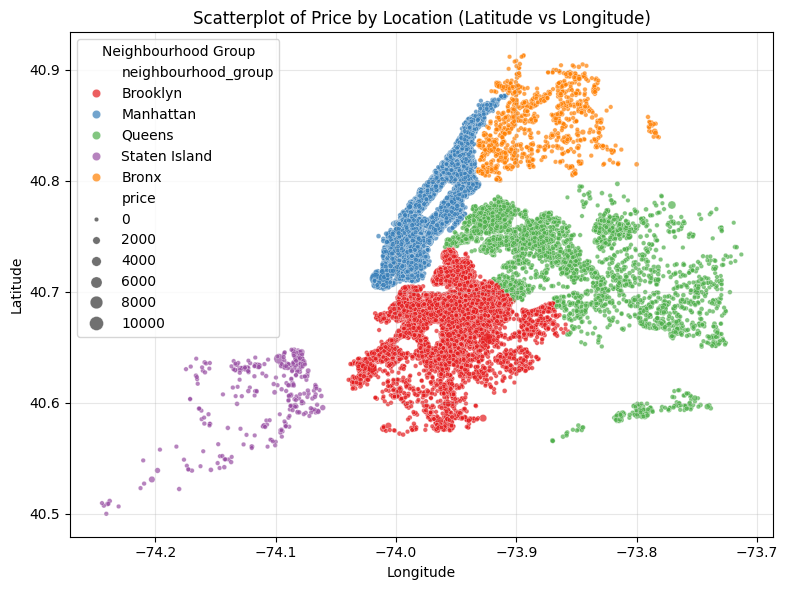

In [ ]:
#Scatterplot: Price vs Latitude and Longitude with colour by Neighbourhood Group
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x=data['longitude'],
    y=data['latitude'],
    hue=data['neighbourhood_group'],
    size=data['price'],
    sizes=(10, 100),
    alpha=0.7,
    palette='Set1'
)

#Plot labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of Price by Location (Latitude vs Longitude)')
plt.legend(title='Neighbourhood Group', loc='upper left')
plt.grid(alpha=0.3)

#Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = data.dropna(subset=['price', 'reviews_per_month'])

#Define features (independent variables) and target (dependent variable)
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
X = data[features]
y = data['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients)

Mean Squared Error (MSE): 36489.181774556644
R-squared (R2): 0.03831103196014307
             Feature  Coefficient
0           latitude   172.257158
1          longitude  -709.097066
2     minimum_nights    -0.069302
3  number_of_reviews    -0.188517
4  reviews_per_month     0.077531
5   availability_365     0.164238


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'AB_NYC_2019.csv' with the correct path to your dataset file
data = pd.read_csv('AB_NYC_2019.csv')

# Step 2: Clean the Data
# Filter out extreme outliers for price to ensure meaningful analysis
data = data[data['price'] < 1000]

# Step 3: Group Prices by Room Type
# Extract price groups for each room type
groups = [group['price'] for _, group in data.groupby('room_type')]

# Step 4: Perform ANOVA Test
anova_result = f_oneway(*groups)

# Step 5: Print ANOVA Test Results
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.5f}")

# Step 6: Interpret Results
if anova_result.pvalue < 0.05:
    print("The p-value is less than 0.05, so we reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference in average prices among room types.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant difference in average prices among room types.")

# Step 7: Visualize Average Price by Room Type
# Calculate average price by room type
room_type_avg_price = data.groupby('room_type')['price'].mean().sort_values(ascending=False)


ANOVA Test Results:
F-statistic: 7446.01
P-value: 0.00000
The p-value is less than 0.05, so we reject the null hypothesis.
This suggests that there is a statistically significant difference in average prices among room types.


In [ ]:
# Statistical Analysis using Simple Linear Regression on Minimum Nights and Price
import statsmodels.api as sm

# Add a constant term to the independent variable for the linear regression model
X = sm.add_constant(data['availability_365'])
Y = data['price']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print out the model summary
print(model.summary())

# Calculate the correlation coefficient from the R-squared value
r_squared = model.rsquared
correlation_coefficient = (r_squared ** 0.5) if model.params[1] >= 0 else -(r_squared ** 0.5)

print('Correlation Coefficient between Availability and Price:', correlation_coefficient)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     681.5
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          3.38e-149
Time:                        22:35:13   Log-Likelihood:            -2.9831e+05
No. Observations:               48597   AIC:                         5.966e+05
Df Residuals:                   48595   BIC:                         5.966e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              128.8807      0.669  

<ipython-input-43-b7e7824c3e3b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation_coefficient = (r_squared ** 0.5) if model.params[1] >= 0 else -(r_squared ** 0.5)


In [ ]:
## THIS IS THE END OF PART IV

In [ ]:
## PART V: EXPORTING THE CLEAN DATA TO A DATABASE

In [ ]:
import sqlite3

# Define the SQLite database path
database_path = 'ab_nyc_data.sqlite'

# Connect to an SQLite database
conn = sqlite3.connect(database_path)

# Export DataFrame to SQLite database
data.to_sql('ab_nyc_listings', conn, if_exists='replace', index=False)

# Close the connection to the database
conn.close()
print(f"Data exported to SQLite database at: {database_path}")

# Set Current Working Directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Reconnect to the SQLite database to query data
conn = sqlite3.connect(database_path)

# Query the data retrieved from the database using read_sql_query
df_from_db = pd.read_sql_query('SELECT * FROM ab_nyc_listings', conn)

# Close the connection
conn.close()

# Show the data output after retrieval to test functionality of the codes above
print("Data extracted from AB NYC SQLite database:")
print(df_from_db.head())



Data exported to SQLite database at: ab_nyc_data.sqlite
Current working directory: /content
Data extracted from AB NYC SQLite database:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

    

In [ ]:
## THIS IS THE END OF PART V